In [1]:
import pandas as pd

In [2]:
total_data=pd.read_csv("../data/interim/eda_data.csv")

In [3]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [5]:
total_data.describe()

,time_occ,rpt_dist_no,vict_age,lat,lon
count,433936.000000,433936.000000,433936.000000,433936.000000,433936.000000
mean,1342.261801,807.326440,29.243091,33.978735,-118.063061
std,653.305824,582.410313,21.737410,1.613498,5.594830
min,1.000000,101.000000,0.000000,0.000000,-118.667600
25%,900.000000,327.000000,0.000000,34.023400,-118.376600
50%,1427.000000,644.000000,30.000000,34.051200,-118.296000
75%,1900.000000,1203.000000,44.000000,34.098100,-118.260900
max,2359.000000,2198.000000,99.000000,34.328900,0.000000


In [6]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

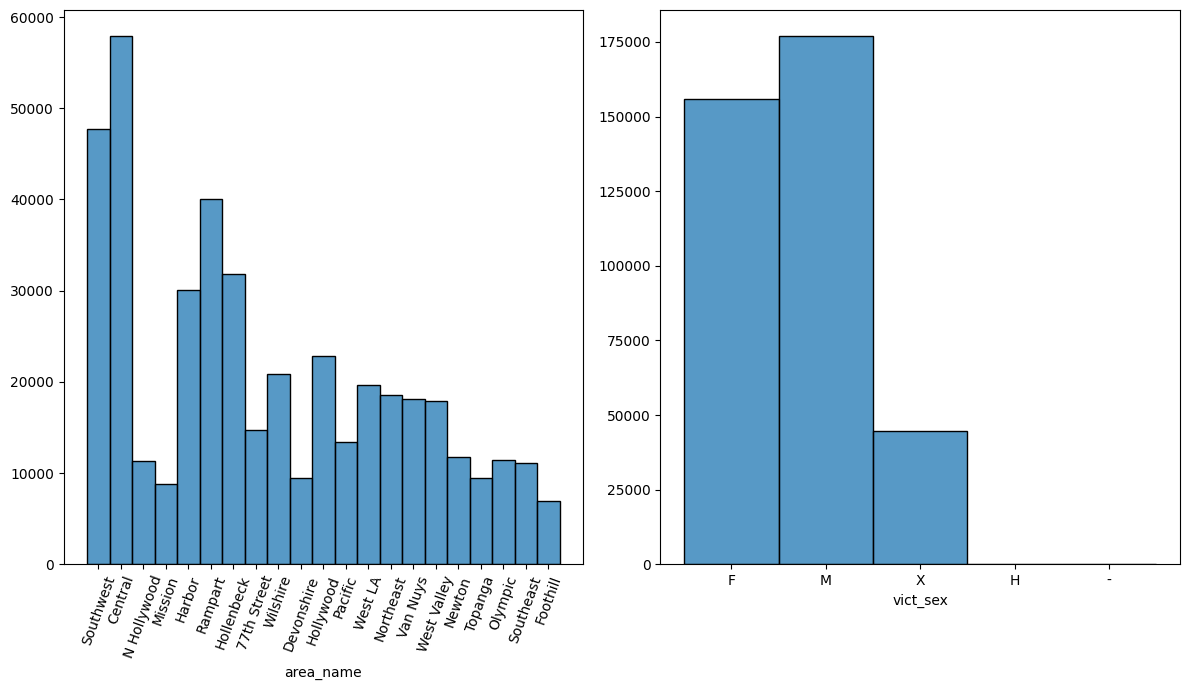

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
#sns.boxplot(ax = axis[1, 0], data = total_data, x = "area_name")#.set(xlabel = None)
#axis[1,0].tick_params(axis='x', rotation=70)
sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)
#sns.boxplot(ax = axis[1, 1], data = total_data, x = "vict_sex")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [9]:
import datetime
total_data['date_occ'] = pd.to_datetime(total_data['date_occ']).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [10]:
valores_nulos_sexo = total_data['vict_sex'].isnull().sum()
valores_nulos_sexo

56472

In [11]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
H        38
-         1
Name: count, dtype: int64

In [12]:
total_data=total_data.loc[(total_data['vict_sex']=='M')|(total_data['vict_sex']=='F')|(total_data['vict_sex']=='X')|(total_data['vict_sex'].isnull())]

In [13]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
Name: count, dtype: int64

In [14]:
valores_nulos_sexo

56472

In [15]:
valores_nulos_raza=total_data['vict_descent'].isnull().sum()
valores_nulos_raza

56475

In [16]:
total_data['vict_descent'].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
-         1
Name: count, dtype: int64

In [17]:
total_data = total_data[total_data['vict_descent'].isin(total_data['vict_descent'].unique()[:-1]) | total_data['vict_sex'].isnull()]
total_data['vict_descent'].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
Name: count, dtype: int64

In [18]:
valores_nulos_raza

56475

In [19]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433896 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      433896 non-null  datetime64[ns]
 1   time_occ      433896 non-null  int64         
 2   area_name     433896 non-null  object        
 3   rpt_dist_no   433896 non-null  int64         
 4   crm_cd_desc   433896 non-null  object        
 5   mocodes       374823 non-null  object        
 6   vict_age      433896 non-null  int64         
 7   vict_sex      377424 non-null  object        
 8   vict_descent  377421 non-null  object        
 9   premis_desc   433611 non-null  object        
 10  weapon_desc   154860 non-null  object        
 11  status_desc   433896 non-null  object        
 12  location      433896 non-null  object        
 13  lat           433896 non-null  float64       
 14  lon           433896 non-null  float64       
dtypes: datetime64[ns](1), 

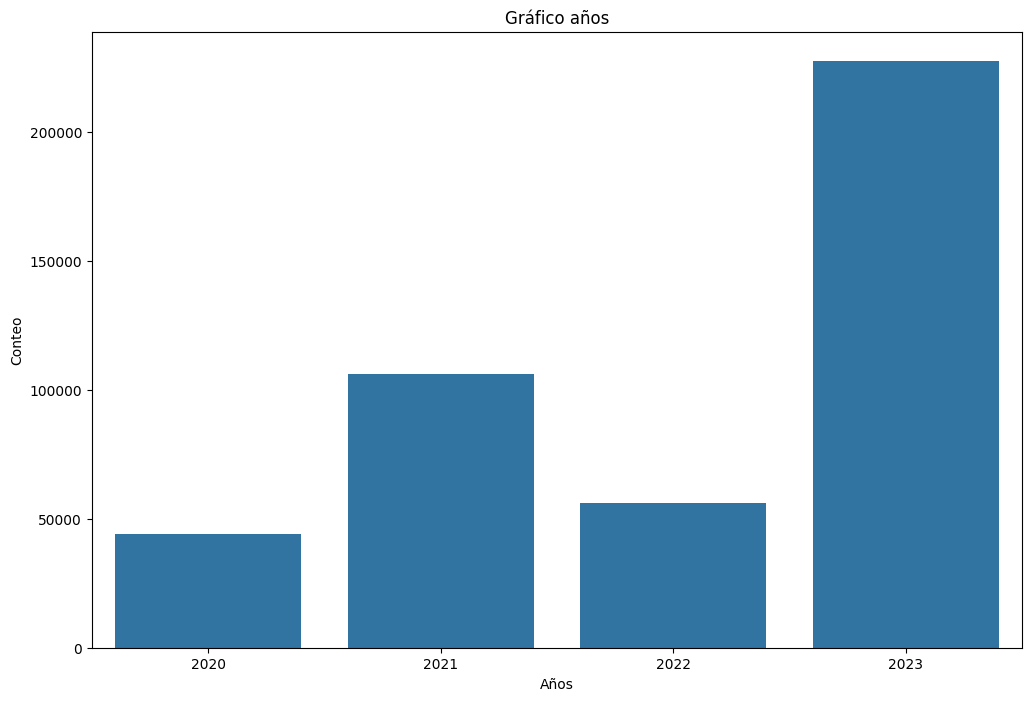

In [20]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [21]:
delitos=total_data.value_counts("crm_cd_desc")[0:20]
delitos=pd.DataFrame(delitos)
delitos.head(5)

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37054
BURGLARY FROM VEHICLE,28201
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27128
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25645


C:\Users\user\AppData\Local\Temp\ipykernel_7852\3918333898.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


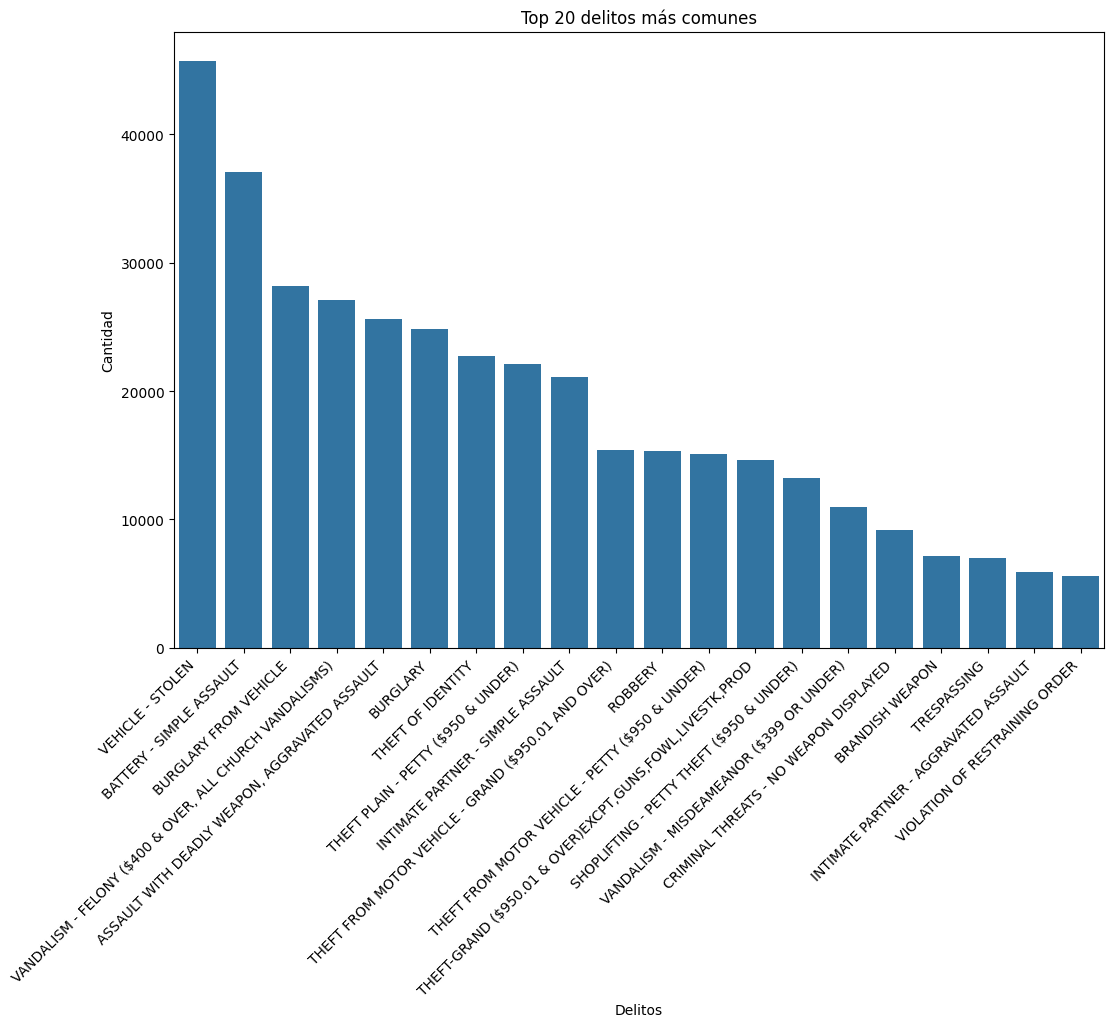

In [22]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)
#ax.set_xticks([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Configurar etiquetas y título
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 20 delitos más comunes')

# Mostrar el gráfico
plt.show()

In [23]:
hours=total_data.value_counts("time_occ")#[0:20]
hours=pd.DataFrame(hours)
hours.head(5)

,count
time_occ,
1200,13221
1800,11334
1700,10576
2000,10424
1900,9730


In [24]:
hours=hours.sort_index()

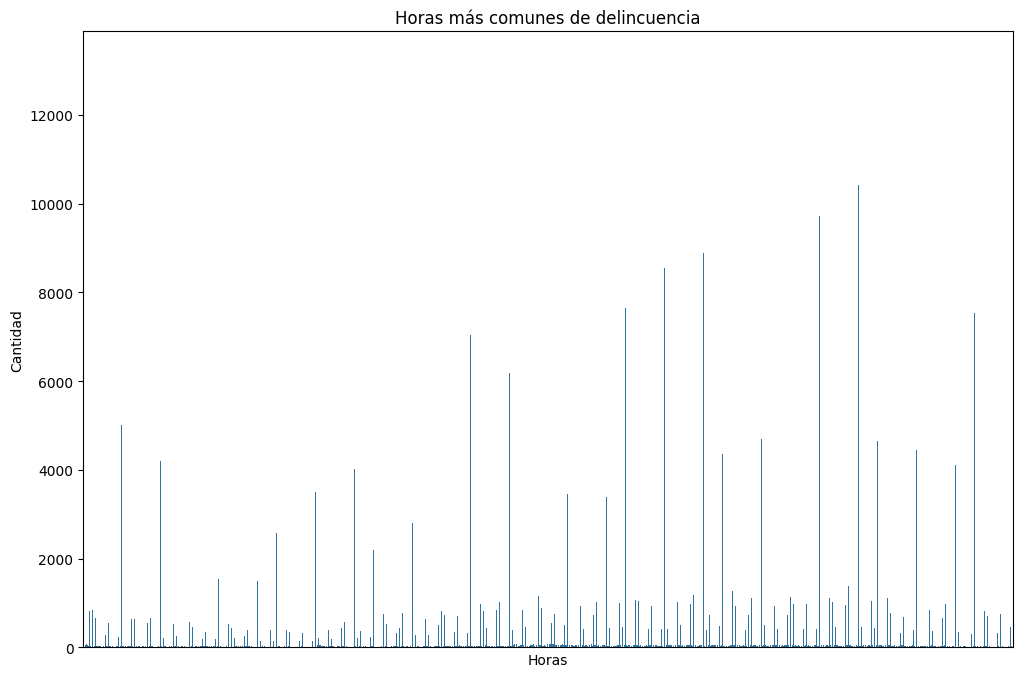

In [25]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['count'], data=hours)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Horas')
plt.ylabel('Cantidad')
plt.title('Horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [26]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:20]
rpt_codes.head(5)

rpt_dist_no
162    4553
182    4015
111    3294
152    2607
153    2528
Name: count, dtype: int64

In [27]:
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head(5)

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


C:\Users\user\AppData\Local\Temp\ipykernel_7852\3524340919.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


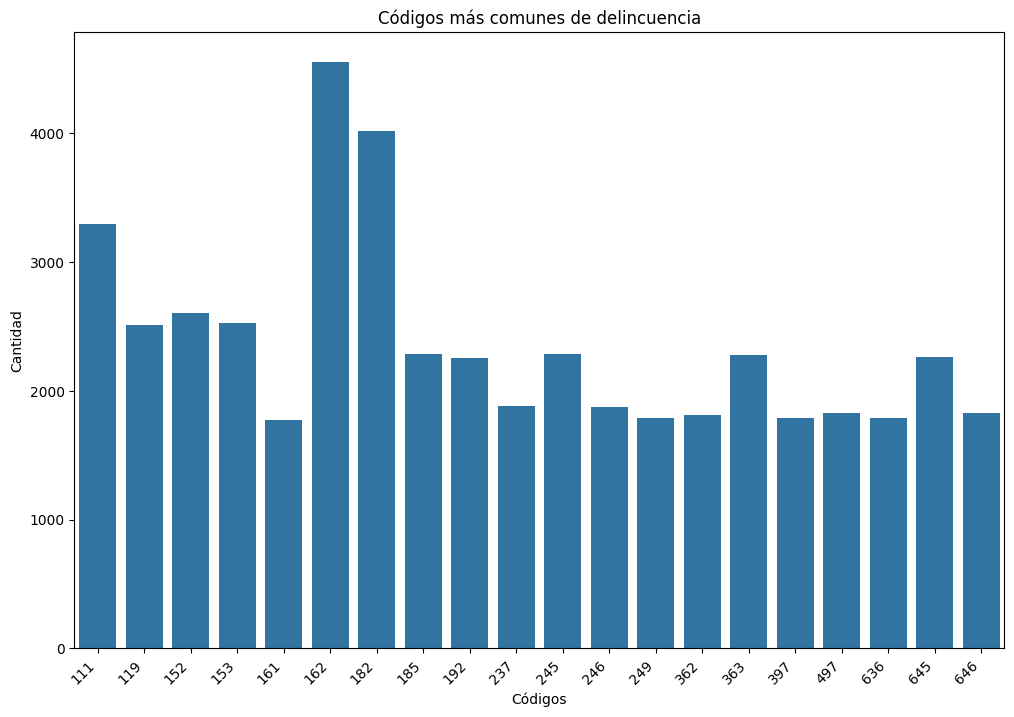

In [28]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Códigos')
plt.ylabel('Cantidad')
plt.title('Códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

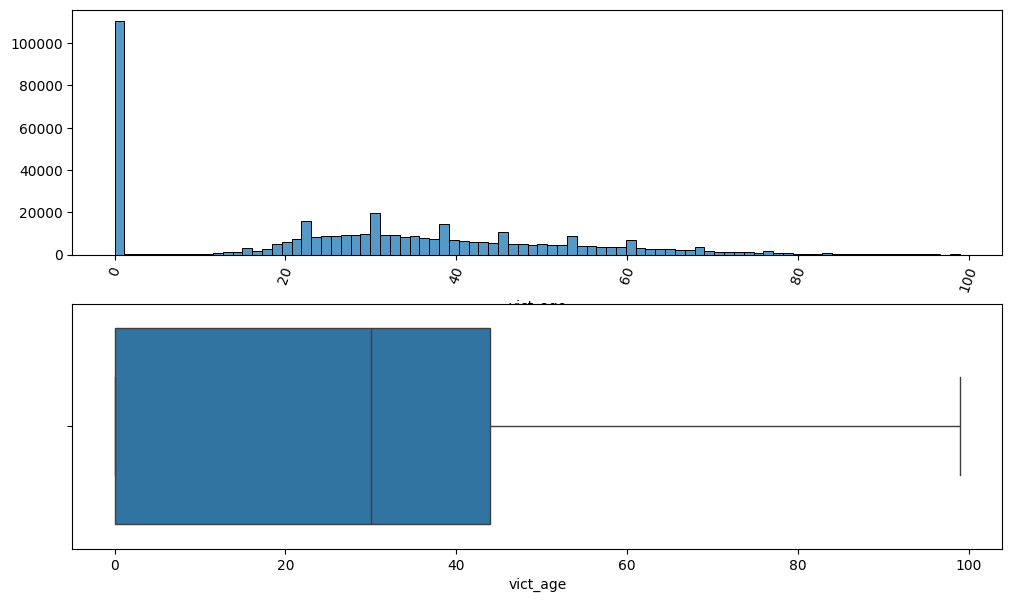

In [29]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")#.set(xlabel = None)

<Axes: xlabel='date_occ'>

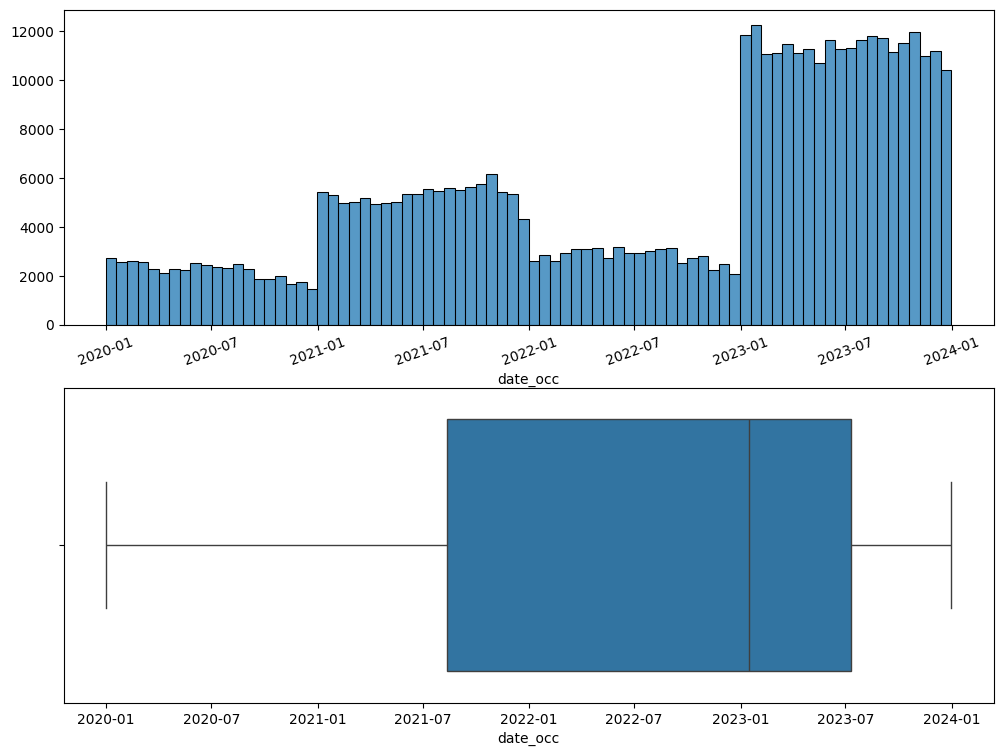

In [30]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [31]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433896 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      433896 non-null  datetime64[ns]
 1   time_occ      433896 non-null  int64         
 2   area_name     433896 non-null  object        
 3   rpt_dist_no   433896 non-null  int64         
 4   crm_cd_desc   433896 non-null  object        
 5   mocodes       374823 non-null  object        
 6   vict_age      433896 non-null  int64         
 7   vict_sex      377424 non-null  object        
 8   vict_descent  377421 non-null  object        
 9   premis_desc   433611 non-null  object        
 10  weapon_desc   154860 non-null  object        
 11  status_desc   433896 non-null  object        
 12  location      433896 non-null  object        
 13  lat           433896 non-null  float64       
 14  lon           433896 non-null  float64       
dtypes: datetime64[ns](1), 

In [32]:
descent=total_data.value_counts("vict_descent")[0:20]
descent=pd.DataFrame(descent)
descent.head()

,count
vict_descent,
H,134284
W,82134
B,62354
X,48055
O,32125


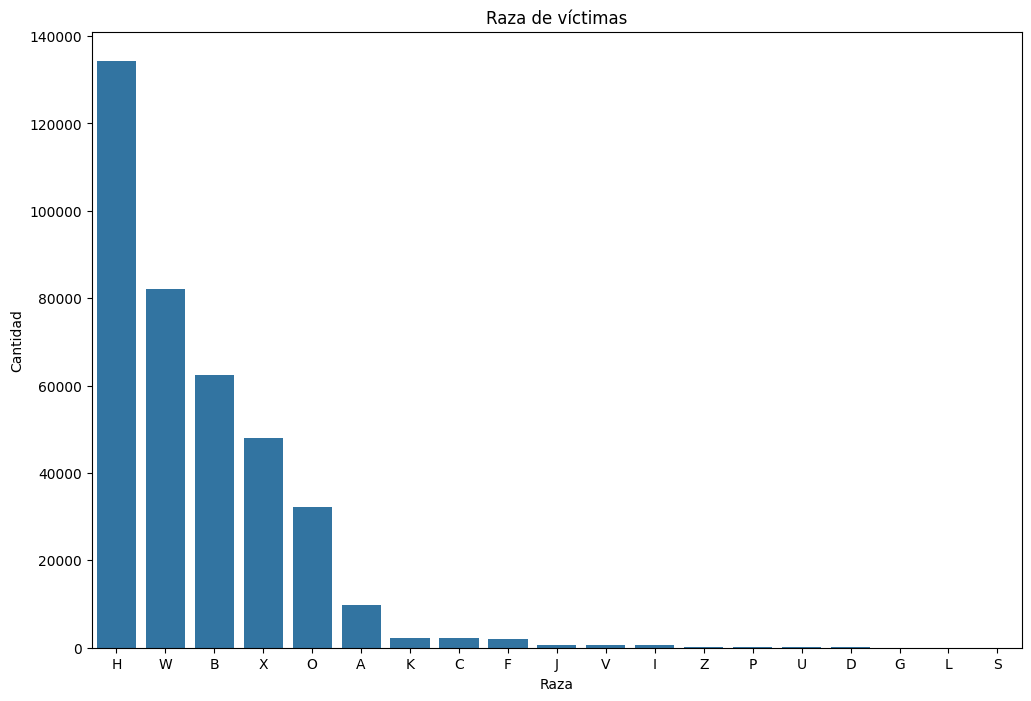

In [33]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)

# Configurar etiquetas y título
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Raza de víctimas')

# Mostrar el gráfico
plt.show()

In [34]:
weapon_desc=total_data.value_counts("weapon_desc")[0:20]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head(10)

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82486
UNKNOWN WEAPON/OTHER WEAPON,17572
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371
OTHER KNIFE,3170
SEMI-AUTOMATIC PISTOL,2976
UNKNOWN FIREARM,2906
MACE/PEPPER SPRAY,1936


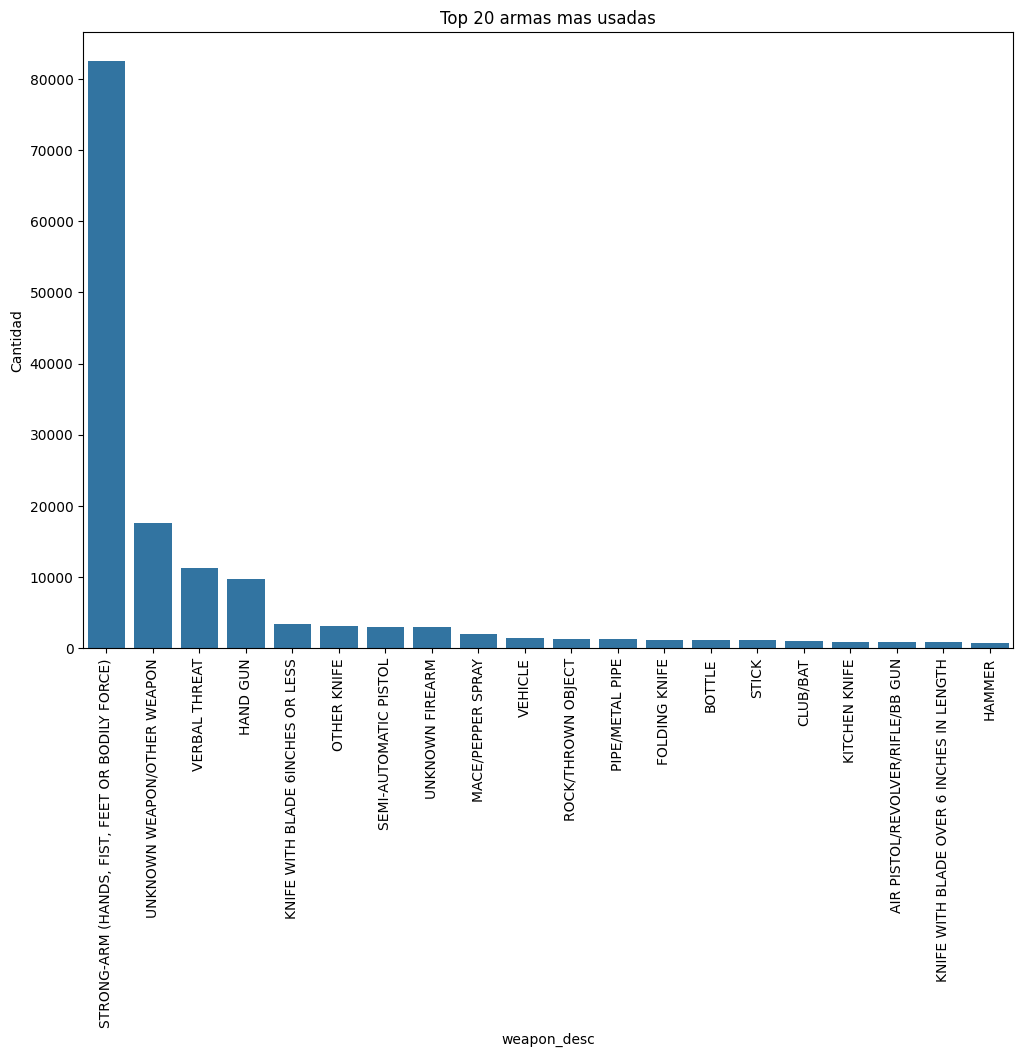

In [35]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('Top 20 armas mas usadas')

# Mostrar el gráfico
plt.show()

In [36]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon#.value_counts()

weapon_desc
True     279036
False    154860
Name: count, dtype: int64

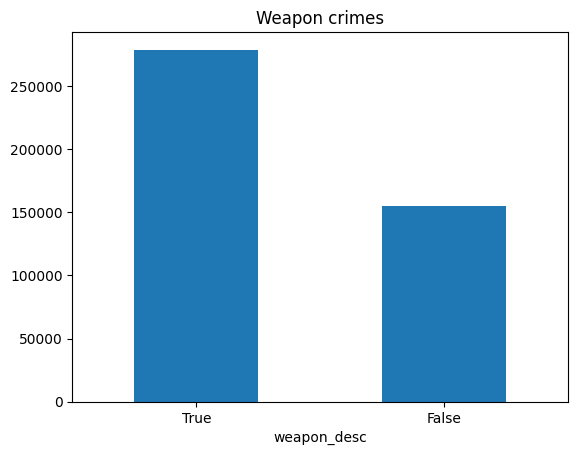

In [37]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()

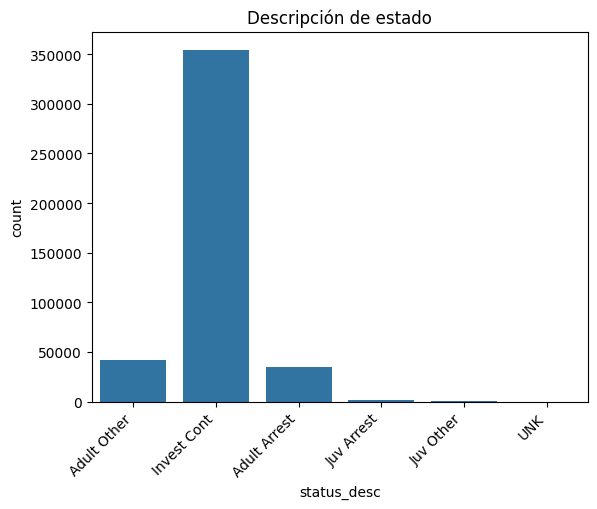

In [38]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

In [39]:
location = total_data.value_counts("location")[0:50]
location = pd.DataFrame(location)
location.head()

,count
location,
800 N ALAMEDA ST,1623
7TH,1247
6TH ST,1228
7TH ST,1178
6TH,1175


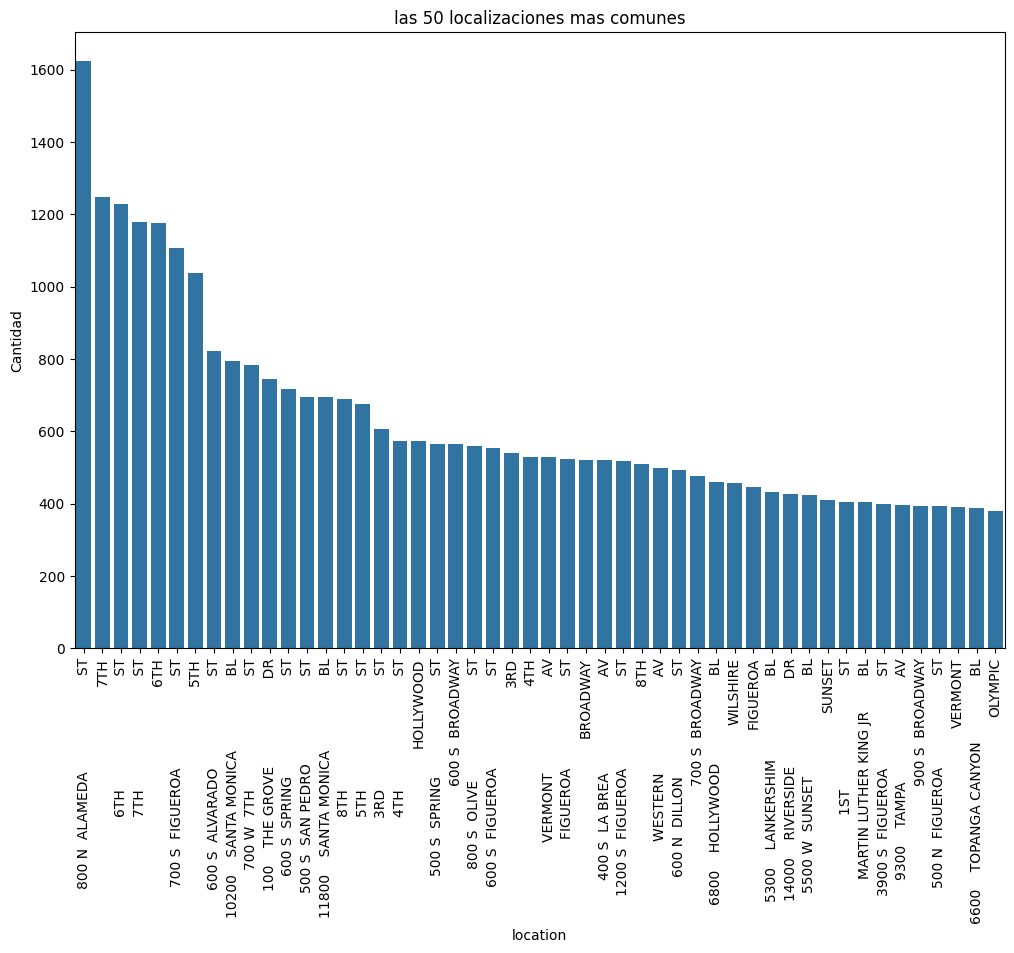

In [40]:
plt.figure(figsize=(12, 8))
# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=location.index, y=location['count'], data=location)
# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('location')
plt.ylabel('Cantidad')
plt.title("las 50 localizaciones mas comunes")
# Mostrar el gráfico
plt.show()

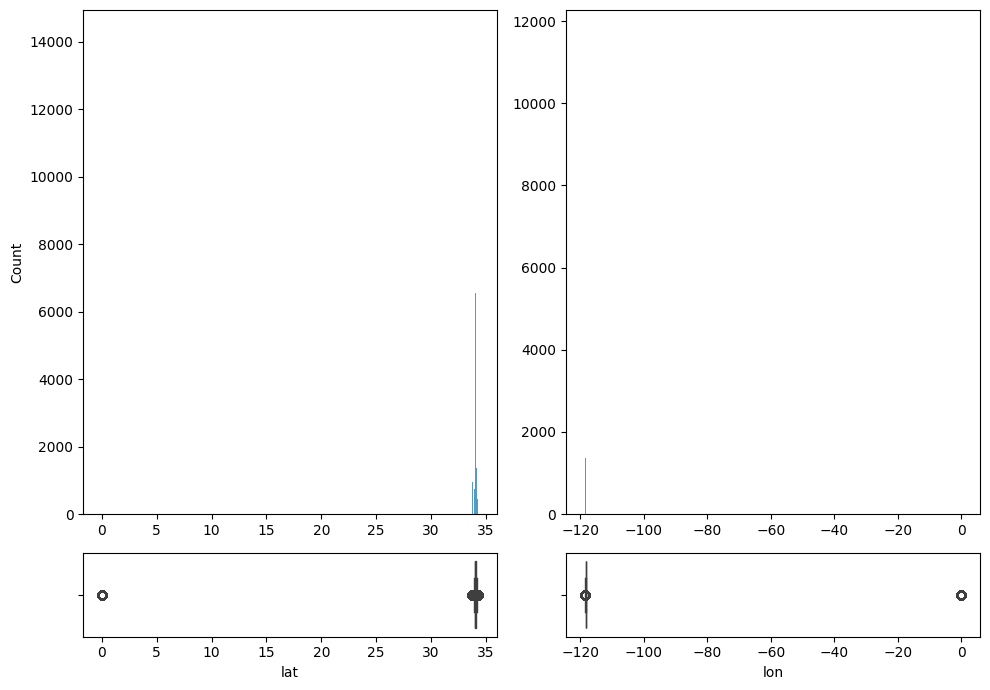

In [41]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [42]:
total_data=total_data.loc[(total_data['lat'] > 0) & (total_data['lat'] > 0)]
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545
2,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,POLICE FACILITY,NaN,Adult Arrest,200 E 6TH ST,34.0448,-118.2474
3,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019
4,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,31,X,X,BEAUTY SUPPLY STORE,NaN,Invest Cont,14400 TITUS ST,34.2198,-118.4468


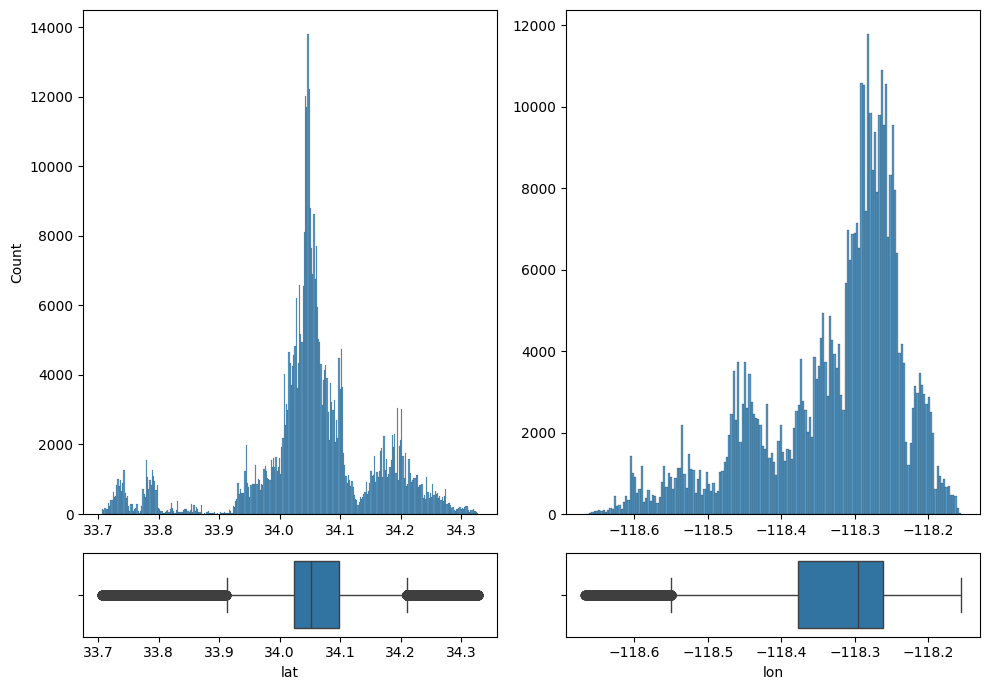

In [43]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

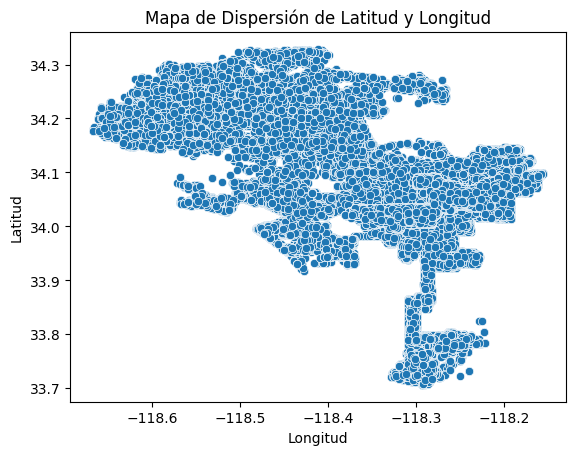

In [44]:
sns.scatterplot(x=total_data['lon'], y=total_data['lat'], data=total_data)
plt.title('Mapa de Dispersión de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [45]:
total_data["date_occ"]

0        2020-01-08
1        2020-01-01
2        2020-02-13
3        2020-01-01
4        2020-01-01
            ...    
433931   2023-11-09
433932   2023-12-19
433933   2023-07-08
433934   2023-07-01
433935   2023-11-09
Name: date_occ, Length: 432924, dtype: datetime64[ns]

In [46]:
columna_dia=total_data["date_occ"].apply(lambda x:x.strftime("%A"))
columna_mes=total_data["date_occ"].apply(lambda x:x.strftime("%B"))

In [47]:
total_data['month']=columna_mes
total_data['weekday']=columna_dia

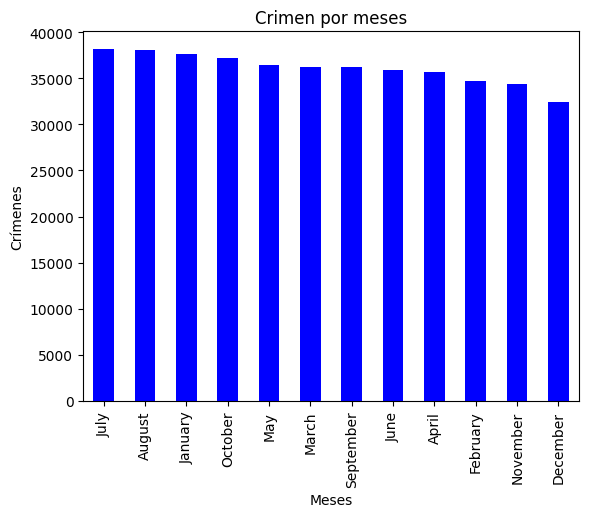

In [48]:
meses=total_data['month'].value_counts()
meses.plot(kind='bar', color='blue')
plt.xlabel('Meses')
plt.ylabel('Crímenes')
plt.title('Crimen por meses')
plt.show()

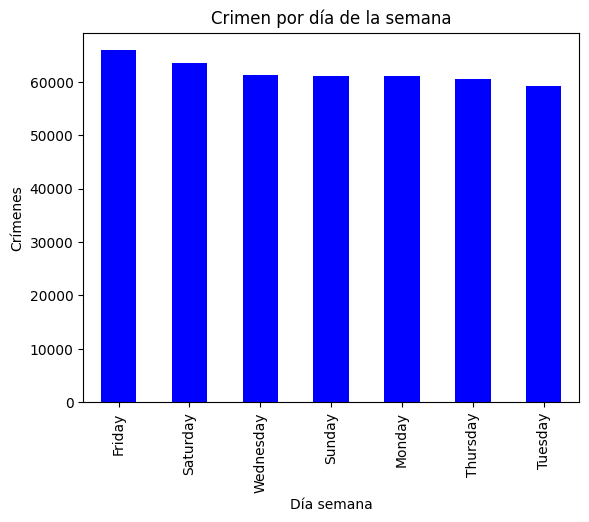

In [49]:
meses=total_data['weekday'].value_counts()
meses.plot(kind='bar', color='blue')
plt.xlabel('Día semana')
plt.ylabel('Crímenes')
plt.title('Crimen por día de la semana')
plt.show()

# Análisis multivariante

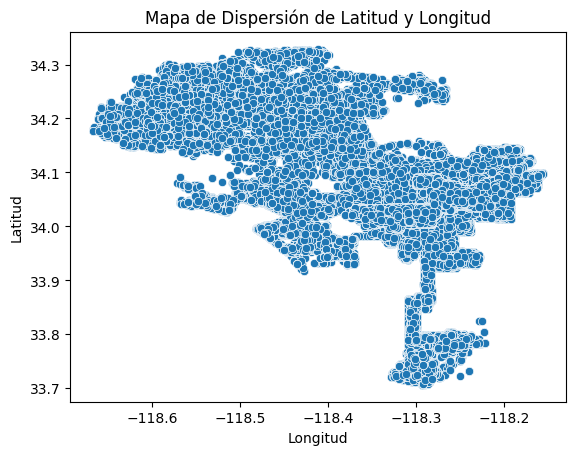

In [50]:
sns.scatterplot(x=total_data['lon'], y=total_data['lat'], data=total_data)
plt.title('Mapa de Dispersión de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

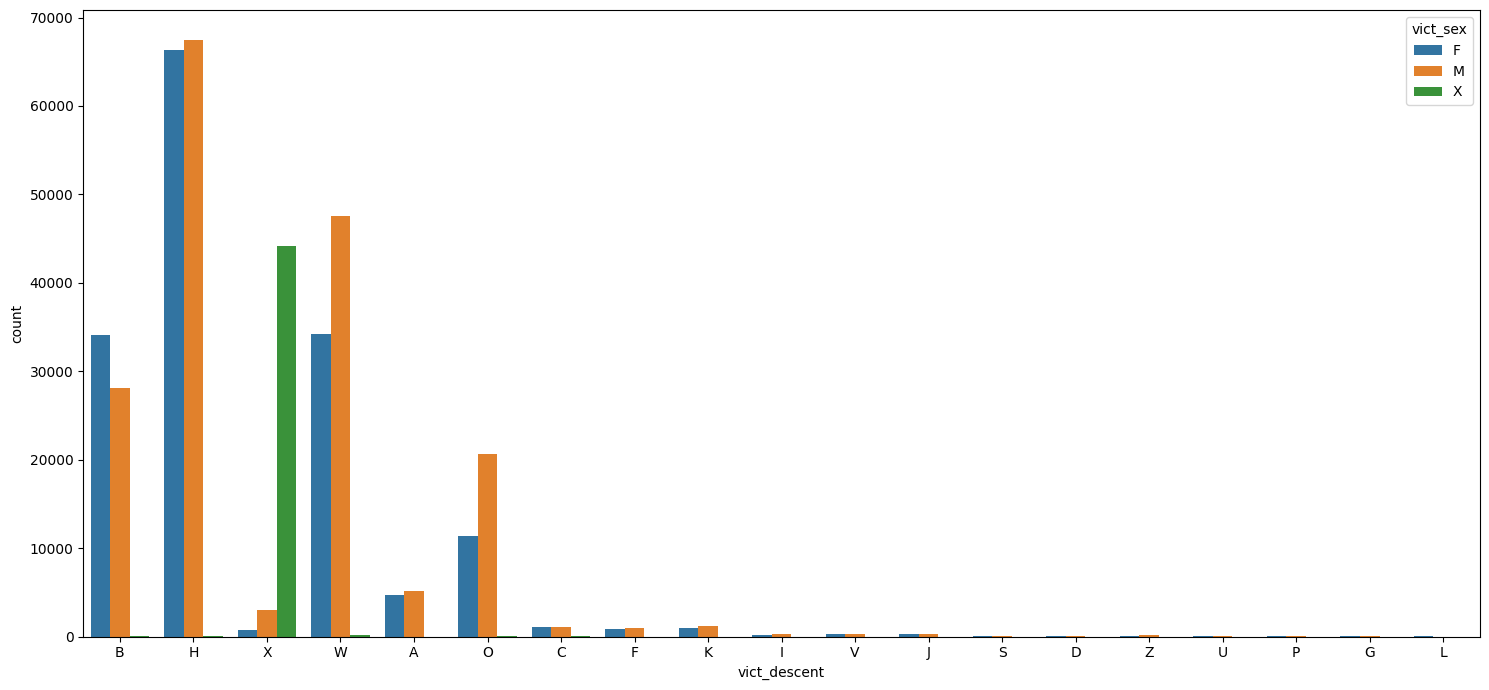

In [51]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot( data = total_data, x = "vict_descent", hue = "vict_sex")

plt.tight_layout()
#fig.delaxes(axis[1, 2])

plt.show()

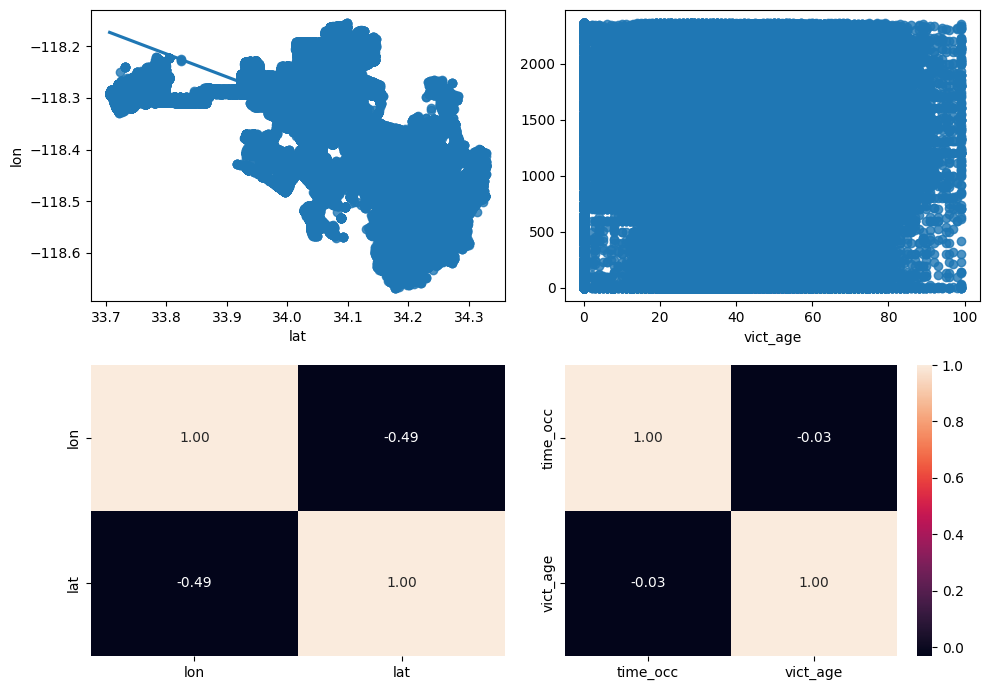

In [52]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "lat", y = "lon")
sns.heatmap(total_data[["lon", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "vict_age", y = "time_occ").set(ylabel=None)
sns.heatmap(total_data[["time_occ", "vict_age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

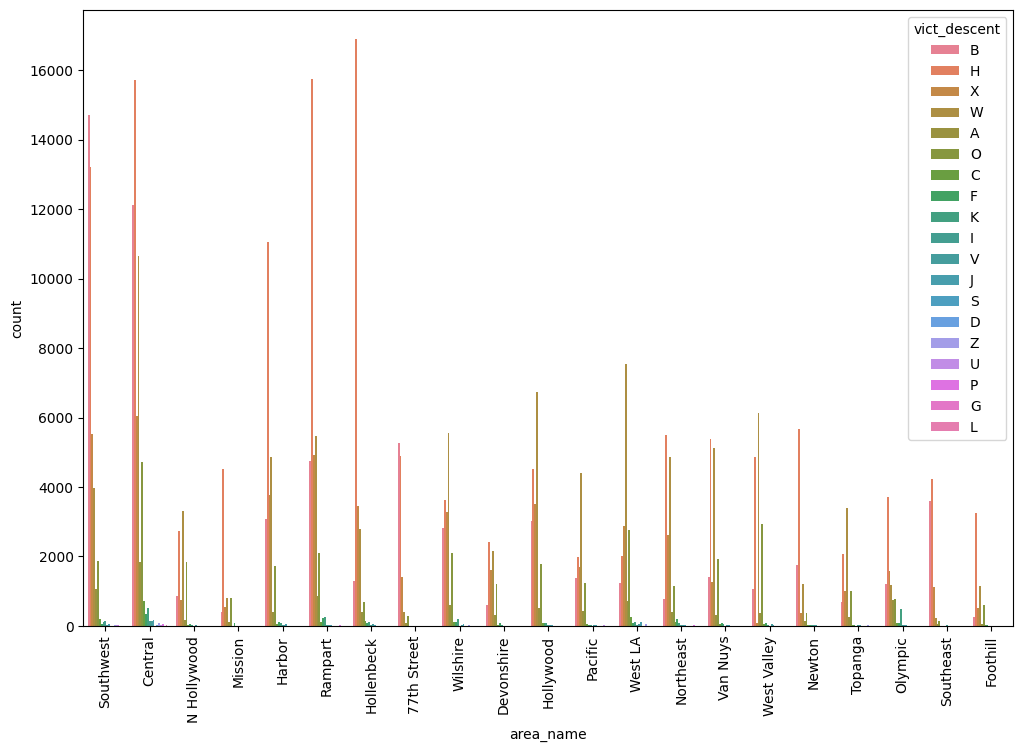

In [53]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

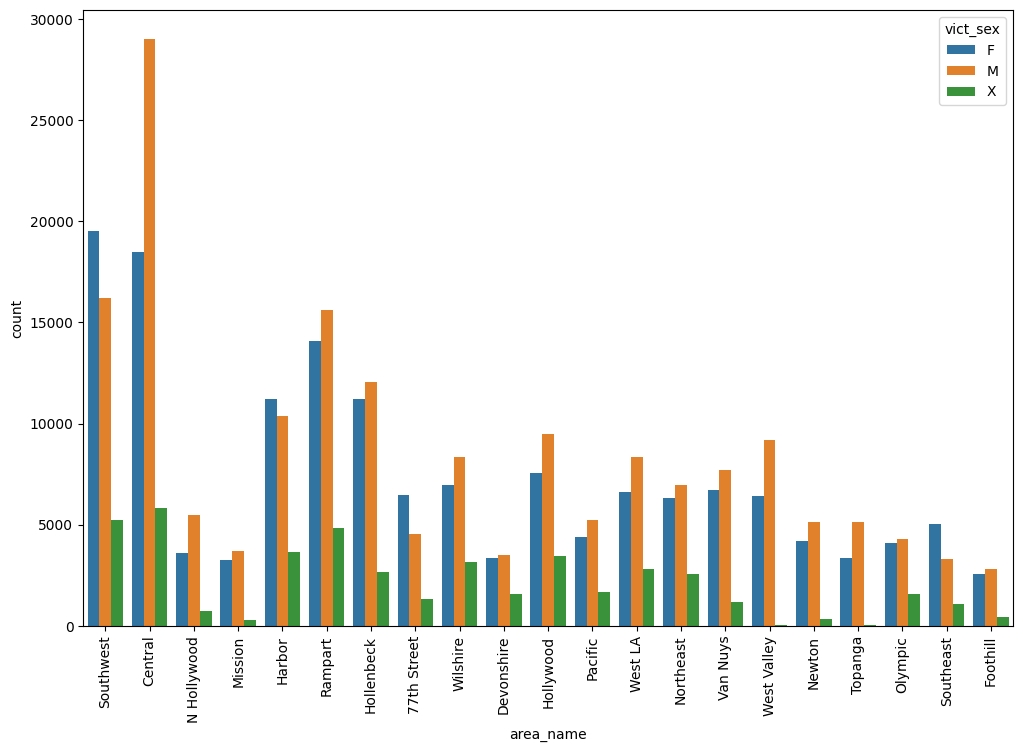

In [54]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_sex")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

In [55]:
total_data["weapon_desc"].fillna("No weapon used", inplace = True)
total_data["weapon_desc"].head()

0    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                       UNKNOWN WEAPON/OTHER WEAPON
2                                    No weapon used
3                                    No weapon used
4                                    No weapon used
Name: weapon_desc, dtype: object

In [56]:
total_data["vict_descent"].value_counts()

vict_descent
H    133916
W     81919
B     62218
X     47928
O     32037
A      9777
K      2212
C      2175
F      1909
J       690
V       563
I       513
Z       248
P       133
U        82
D        54
G        33
L        33
S        23
Name: count, dtype: int64

In [57]:
total_data["vict_sex"].fillna("X", inplace = True)
total_data["vict_descent"].fillna("X", inplace = True)

In [58]:
total_data=total_data.dropna(subset=['premis_desc'])
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432639 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      432639 non-null  datetime64[ns]
 1   time_occ      432639 non-null  int64         
 2   area_name     432639 non-null  object        
 3   rpt_dist_no   432639 non-null  int64         
 4   crm_cd_desc   432639 non-null  object        
 5   mocodes       373597 non-null  object        
 6   vict_age      432639 non-null  int64         
 7   vict_sex      432639 non-null  object        
 8   vict_descent  432639 non-null  object        
 9   premis_desc   432639 non-null  object        
 10  weapon_desc   432639 non-null  object        
 11  status_desc   432639 non-null  object        
 12  location      432639 non-null  object        
 13  lat           432639 non-null  float64       
 14  lon           432639 non-null  float64       
 15  month         432639 n

In [59]:
total_data=total_data.loc[total_data['vict_age']>0]

In [60]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322660 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      322660 non-null  datetime64[ns]
 1   time_occ      322660 non-null  int64         
 2   area_name     322660 non-null  object        
 3   rpt_dist_no   322660 non-null  int64         
 4   crm_cd_desc   322660 non-null  object        
 5   mocodes       320504 non-null  object        
 6   vict_age      322660 non-null  int64         
 7   vict_sex      322660 non-null  object        
 8   vict_descent  322660 non-null  object        
 9   premis_desc   322660 non-null  object        
 10  weapon_desc   322660 non-null  object        
 11  status_desc   322660 non-null  object        
 12  location      322660 non-null  object        
 13  lat           322660 non-null  float64       
 14  lon           322660 non-null  float64       
 15  month         322660 n

In [61]:
codigos=pd.read_csv("../data/raw/mo_codes_data.csv")    

In [62]:
codigos["REV: 07/19"]
codigos['code']=codigos["REV: 07/19"].str[:4]
codigos['modus_operandi']=codigos["REV: 07/19"].str[4:]
    

In [63]:
codigos.head()

,REV: 07/19,code,modus_operandi
0,0100 Suspect Impersonate,0100,Suspect Impersonate
1,0101 Aid victim,0101,Aid victim
2,0102 Blind,0102,Blind
3,0103 Physically disabled,0103,Physically disabled
4,0104 Customer,0104,Customer


In [64]:
codigos.drop(['REV: 07/19'],axis=1,inplace=True)
codigos.head()

,code,modus_operandi
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [65]:
codigos = codigos[~codigos['code'].str.contains(r'[a-zA-Z]')]

In [66]:
codigos.head()

,code,modus_operandi
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [67]:
total_data['mocodes'].fillna("0", inplace=True)

In [68]:
count=0
for i in total_data["mocodes"]:
    if type(i)==float:
        count+=1
        print(i)
count

0

In [69]:
total_data['mocodes']=total_data['mocodes'].str.split(" ")

In [70]:
total_data['mocodes'].head()

0                [0444, 0913]
1          [0416, 1822, 1414]
3                [0329, 1402]
4                      [0329]
5    [0413, 1822, 1262, 1415]
Name: mocodes, dtype: object

In [71]:
total_data['mocodes']=total_data['mocodes'].apply(lambda x: sorted(x))

In [72]:
mocodes_expanded = total_data["mocodes"].apply(pd.Series)

In [73]:
mocodes_expanded.fillna("0", inplace=True)

In [74]:
mocodes_expanded.head()

,0,1,2,3,4,5,6,7,8,9
0,0444,0913,0,0,0,0,0,0,0,0
1,0416,1414,1822,0,0,0,0,0,0,0
3,0329,1402,0,0,0,0,0,0,0,0
4,0329,0,0,0,0,0,0,0,0,0
5,0413,1262,1415,1822,0,0,0,0,0,0


In [75]:
nueva_fila = {'code':'0','modus_operandi':" "}
df_nueva_fila = pd.DataFrame([nueva_fila])
codigos = pd.concat([codigos, df_nueva_fila], ignore_index=True)

In [76]:
mapping_dict = dict(zip(codigos['code'], codigos['modus_operandi']))

# Reemplazar los valores numéricos con sus correspondientes modus_operandi
text_modus = mocodes_expanded.replace(mapping_dict)


In [77]:
text_modus.head()

,0,1,2,3,4,5,6,7,8,9
0,Pushed,Victim knew Suspect,,,,,,,,
1,Hit-Hit w/ weapon,Photographs,Stranger,,,,,,,
3,Vandalized,Evidence Booked (any crime),,,,,,,,
4,Vandalized,,,,,,,,,
5,Drugged,Raped while unconscious,Rape Kit,Stranger,,,,,,


In [78]:
text_modus=text_modus[0]+text_modus[1]+text_modus[2]+text_modus[3]+text_modus[4]+text_modus[5]+text_modus[6]+text_modus[7]+text_modus[8]+text_modus[9]

In [79]:
text_modus=text_modus.apply(lambda x:x.lower())

In [80]:
text_modus.head()

0                   pushed victim knew suspect        
1        hit-hit w/ weapon photographs stranger       
3       vandalized evidence booked (any crime)        
4                                  vandalized         
5     drugged raped while unconscious rape kit stra...
dtype: object

In [81]:
total_data["mocodes_desc"] = text_modus

In [82]:
total_data.drop(['mocodes'],axis=1,inplace=True)

In [83]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322660 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      322660 non-null  datetime64[ns]
 1   time_occ      322660 non-null  int64         
 2   area_name     322660 non-null  object        
 3   rpt_dist_no   322660 non-null  int64         
 4   crm_cd_desc   322660 non-null  object        
 5   vict_age      322660 non-null  int64         
 6   vict_sex      322660 non-null  object        
 7   vict_descent  322660 non-null  object        
 8   premis_desc   322660 non-null  object        
 9   weapon_desc   322660 non-null  object        
 10  status_desc   322660 non-null  object        
 11  location      322660 non-null  object        
 12  lat           322660 non-null  float64       
 13  lon           322660 non-null  float64       
 14  month         322660 non-null  object        
 15  weekday       322660 n

In [84]:
total_data.to_csv("../data/interim/mocodes.csv")

In [85]:
import regex as re
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)
    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())
    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    return text.split()

# Applying a function to preprocess the text
total_data['mocodes_desc'] = total_data['mocodes_desc'].apply(preprocess_text)
total_data['mocodes_desc'].head()

0                      [pushed, victim, knew, suspect]
1            [hit, hit, weapon, photographs, stranger]
3           [vandalized, evidence, booked, any, crime]
4                                         [vandalized]
5    [drugged, raped, while, unconscious, rape, kit...
Name: mocodes_desc, dtype: object

In [86]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: ' '.join(x))

In [87]:
total_data["mocodes_desc"].head()

0                           pushed victim knew suspect
1                  hit hit weapon photographs stranger
3                 vandalized evidence booked any crime
4                                           vandalized
5    drugged raped while unconscious rape kit stranger
Name: mocodes_desc, dtype: object

In [88]:
str_columns=total_data.select_dtypes(include='object').columns
str_columns

Index(['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'month', 'weekday',
       'mocodes_desc'],
      dtype='object')

In [89]:
# lst=[pd.factorize(total_data[i])[0] for i in str_columns]
# lst

In [90]:
columnas_factorizadas = {i: dict(zip(total_data[i], pd.factorize(total_data[i])[0])) for i in str_columns}

In [91]:
resultados_json = pd.Series(columnas_factorizadas).to_json(indent=2)

with open('../data/interim/fact.json', 'w') as file:
    file.write(resultados_json)

In [92]:
# columnas_factorizadas['weekday']

In [93]:
for i in str_columns:
    total_data[i]=pd.factorize(total_data[i])[0]

In [94]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322660 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      322660 non-null  datetime64[ns]
 1   time_occ      322660 non-null  int64         
 2   area_name     322660 non-null  int64         
 3   rpt_dist_no   322660 non-null  int64         
 4   crm_cd_desc   322660 non-null  int64         
 5   vict_age      322660 non-null  int64         
 6   vict_sex      322660 non-null  int64         
 7   vict_descent  322660 non-null  int64         
 8   premis_desc   322660 non-null  int64         
 9   weapon_desc   322660 non-null  int64         
 10  status_desc   322660 non-null  int64         
 11  location      322660 non-null  int64         
 12  lat           322660 non-null  float64       
 13  lon           322660 non-null  float64       
 14  month         322660 non-null  int64         
 15  weekday       322660 n

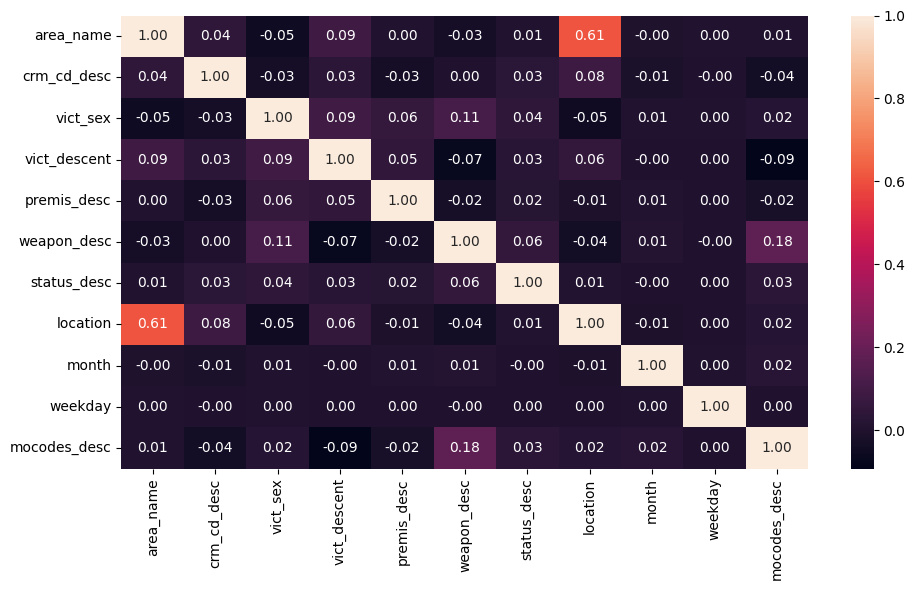

In [95]:
# total_data["area_name"] = pd.factorize(total_data["area_name"])[0]
# total_data["crm_cd_desc"] = pd.factorize(total_data["crm_cd_desc"])[0]
# total_data["vict_sex"] = pd.factorize(total_data["vict_sex"])[0]
# total_data["vict_descent"] = pd.factorize(total_data["vict_descent"])[0]
# total_data["premis_desc"] = pd.factorize(total_data["premis_desc"])[0]
# total_data["weapon_desc"] = pd.factorize(total_data["weapon_desc"])[0]
# total_data["status_desc"] = pd.factorize(total_data["status_desc"])[0]
# total_data["location"] = pd.factorize(total_data["location"])[0]


fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'month', 'weekday',
       'mocodes_desc']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

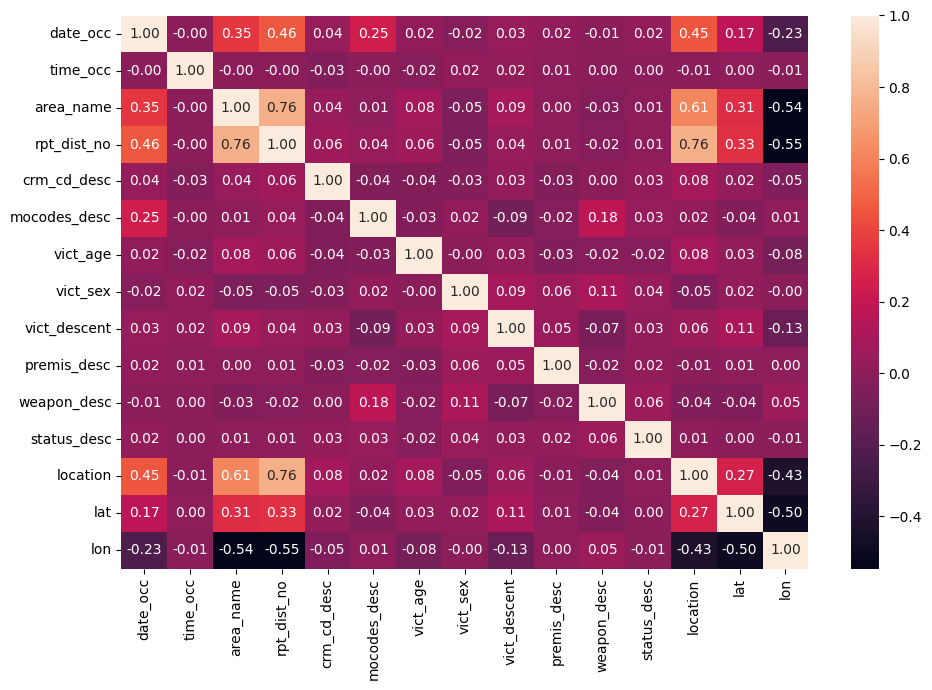

In [96]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes_desc', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [114]:
data_prueba=pd.read_csv('../data/interim/mocodes.csv')

In [135]:
total_crimes_by_area = data_prueba.groupby('area_name')['crm_cd_desc'].count().reset_index()
total_crimes_by_area.columns = ['area_name', 'total_crimes']
total_crimes_by_area

,area_name,total_crimes
0,77th Street,10893
1,Central,45368
2,Devonshire,6773
3,Foothill,5090
4,Harbor,20755
5,Hollenbeck,21472
6,Hollywood,16845
7,Mission,6412
8,N Hollywood,7815
9,Newton,8252


In [132]:
# Contar el número de crímenes específicos (puedes ajustar esto según tus necesidades)
specific_crime_count_by_area = data_prueba.groupby(['area_name', 'crm_cd_desc']).size().reset_index(name='crime_count')
specific_crime_count_by_area[-5:]

,area_name,crm_cd_desc,crime_count
1958,Wilshire,VEHICLE - ATTEMPT STOLEN,27
1959,Wilshire,VEHICLE - STOLEN,6
1960,Wilshire,VIOLATION OF COURT ORDER,162
1961,Wilshire,VIOLATION OF RESTRAINING ORDER,162
1962,Wilshire,VIOLATION OF TEMPORARY RESTRAINING ORDER,4


In [134]:
# Unir los dos conjuntos de datos
merged_total_data = pd.merge(total_crimes_by_area, specific_crime_count_by_area, on='area_name')
merged_total_data.head()

,area_name,total_crimes,crm_cd_desc,crime_count
0,77th Street,10893,ARSON,41
1,77th Street,10893,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1330
2,77th Street,10893,ATTEMPTED ROBBERY,77
3,77th Street,10893,BATTERY - SIMPLE ASSAULT,1275
4,77th Street,10893,BATTERY ON A FIREFIGHTER,1


In [ ]:
# Calcular el porcentaje de crímenes por área
merged_total_data['crime_percentage'] = (merged_total_data['crime_count'] / merged_total_data['total_crimes']) * 100
# Encontrar el tipo de crimen con el mayor porcentaje por área
max_crime_by_area = merged_total_data.loc[merged_total_data.groupby('area_name')['crime_percentage'].idxmax()]
# Mostrar el resultado
print(max_crime_by_area[['area_name', 'crm_cd_desc', 'crime_percentage']])